## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산ㅇ르 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
[표분분산이 분산을 과소 평가하는 이유]
- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6 
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [83]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [84]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [85]:
score_df = pd.DataFrame({'score':scores},
#                         index = ['A','B','C','D','E','F','G','H','I','J'])
                       index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [86]:
# 평균값
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

In [87]:
# 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [88]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

In [89]:
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

In [90]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [91]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [92]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [93]:
np.mean(deviation)

0.0

In [94]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

In [95]:
arr = np.random.randint(0,1000,size = 20)
m = np.mean(arr)
display(m)
dev = arr-m
display(dev)
display(np.sum(dev))

514.35

array([-113.35, -162.35, -111.35, -307.35,  -32.35,  449.65,  415.65,
       -356.35,  457.65,  395.65, -344.35,  357.65, -334.35, -192.35,
        303.65, -130.35,  173.65,  183.65, -262.35, -390.35])

-4.547473508864641e-13

분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨.

In [96]:
np.mean(deviation ** 2)

86.0

In [97]:
np.var(scores)

86.0

In [98]:
score_df.var()

score    95.555556
dtype: float64

In [99]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [100]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [101]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [102]:
np.std(scores)

9.273618495495704

In [103]:
df.std(ddof=0)

score                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

In [104]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [105]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [106]:
# 요약 통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [107]:
# 데이터의 정규화

print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


In [108]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [109]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [110]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [111]:
score_df['deviation_value'] = z

In [112]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [113]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [114]:
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [115]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [116]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [117]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [118]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [119]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [120]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

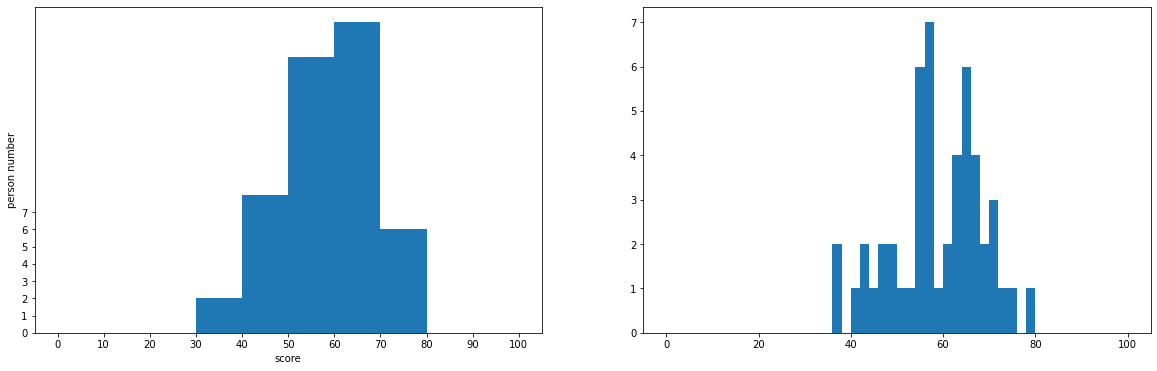

In [121]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq, _, _ = ax1.hist(eng_scores, bins=10, range=(0,100))
freq, _, _ = ax2.hist(eng_scores, bins=50, range=(0,100))
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

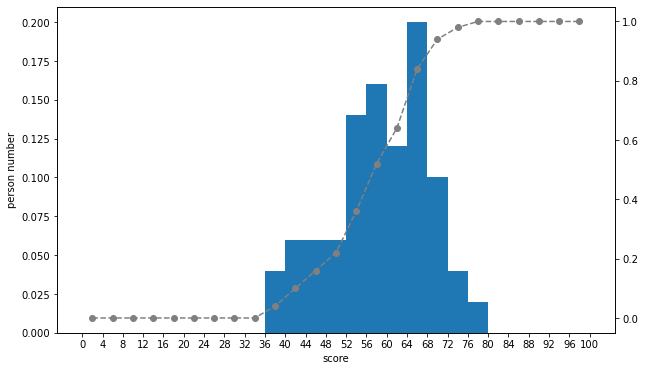

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

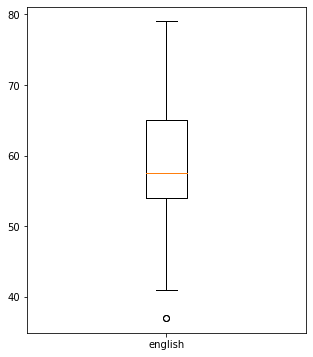

In [123]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [124]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
print(mu)
s = np.sum((data-mu)**2)/len(data)
s

4.0


1.2

In [125]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

In [126]:
# [과제] 1변향 데이터 data에 대하여 평균, 표본분산, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단, 함수사용하는 경우와 사용하지 않는 경우를 모두 수행

In [127]:
arr = np.arange(10)
print(arr)
#평균
print(f'평균 : {arr.mean()}')
#편차
print(f'편차 : {arr-arr.mean()}')
#분산 sum(편차^2) / 길이 
#표본분산
print(f'표본분산 :{np.sum((arr-arr.mean())**2)/(len(arr)-1)}')
print(f'표본분산pd :{arr.var(ddof=1)}')
print(f'표본분산np :{np.var(arr,ddof=1)}')

#불편분산
print(f'불편분산 :{np.sum((arr-arr.mean())**2)/(len(arr))}')
print(f'불편분산pd :{np.var(arr)}')
print(f'불편분산np :{arr.var()}')
#최대
print(f'최대값 :{arr.max()}')
#최소
print(f'최소값 :{arr.min()}')
#표준편차
print(f'표준편차 :{(np.sum((arr-arr.mean())**2)/(len(arr)-1))**(1/2)}')
print(f'표준편차pd :{arr.std(ddof=1)}')#pandas 표본분산
print(f'표준편차np :{np.std(arr)}') 
# ddof=0이면 불편분산 1이면 표준분산


#4분위수
arr_25 = np.percentile(arr,25)
arr_75 = np.percentile(arr,75)
IQR = arr_75-arr_25
IQR


#중앙값
n = len(arr)
if n%2 == 0:
    med_0 = arr[n//2-1]
    med_1 = arr[n//2]
    med = (med_0+med_1)/2
else:
    med = arr[(n+1)//2-1]
print('중앙값:',med)
print('중앙값:',np.median(arr))
print(pd.DataFrame(arr).median())



[0 1 2 3 4 5 6 7 8 9]
평균 : 4.5
편차 : [-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
표본분산 :9.166666666666666
표본분산pd :9.166666666666666
표본분산np :9.166666666666666
불편분산 :8.25
불편분산pd :8.25
불편분산np :8.25
최대값 :9
최소값 :0
표준편차 :3.0276503540974917
표준편차pd :3.0276503540974917
표준편차np :2.8722813232690143
중앙값: 4.5
중앙값: 4.5
0    4.5
dtype: float64


## 2차원 데이터

In [128]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathematics':ms_scores},
                  index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [129]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [130]:
dfc['product of deviation'].mean()

62.8

In [131]:
# ddof 확인 요
cov_mat = np.cov(en_scores,ms_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [132]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [133]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [134]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [135]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [155]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)
arr = np.random.randint(1,10,size=20).reshape(-1,10)
print(arr)
#numpy
a1 = arr[:,0]
a2 = arr[:,1]
co1 = np.cov(a1,a2)
print('공분산', co1[0,1])
print('상관관계',np.corrcoef(a1,a2)[0,1])

# pandas 방식
df = pd.DataFrame(arr)
print('pd공분산',df.cov()[0][1])
print('상관관계',df.corr()[0][1])

# # 함수를 쓰지 않고서도 해보자 
#분산과 차이점: 제곱이 아니라 각각 열의 편차를 서로 곱해줌
# print(f'표본분산 :{np.sum((arr-arr.mean())**2)/(len(arr)-1)}')
co2 = ((a1-a1.mean())*((a2-a2.mean()))).sum()/(len(a1)-1)
print('공분산',co2)
coef2 = co2/(np.std(a1,ddof=1)*np.std(a2,ddof=1))
coef2
# ddof 값 안 넣으면 표본분산으로 계산해서
# pandas 불편분산 쪽 값과는 다르게 나올 것임


[[2 9 3 4 8 3 9 1 6 3]
 [1 3 3 1 3 4 8 7 8 3]]
공분산 3.0
상관관계 1.0
pd공분산 3.0
상관관계 1.0
공분산 3.0


1.0

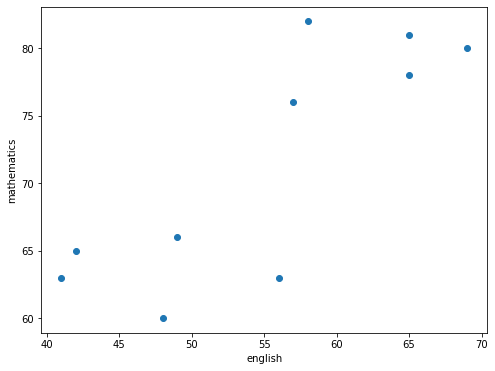

In [137]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()

다항곡선 회귀분석

기본문법 p=polyfit(x,y,n)

https://qlsenddl-lab.tistory.com/48


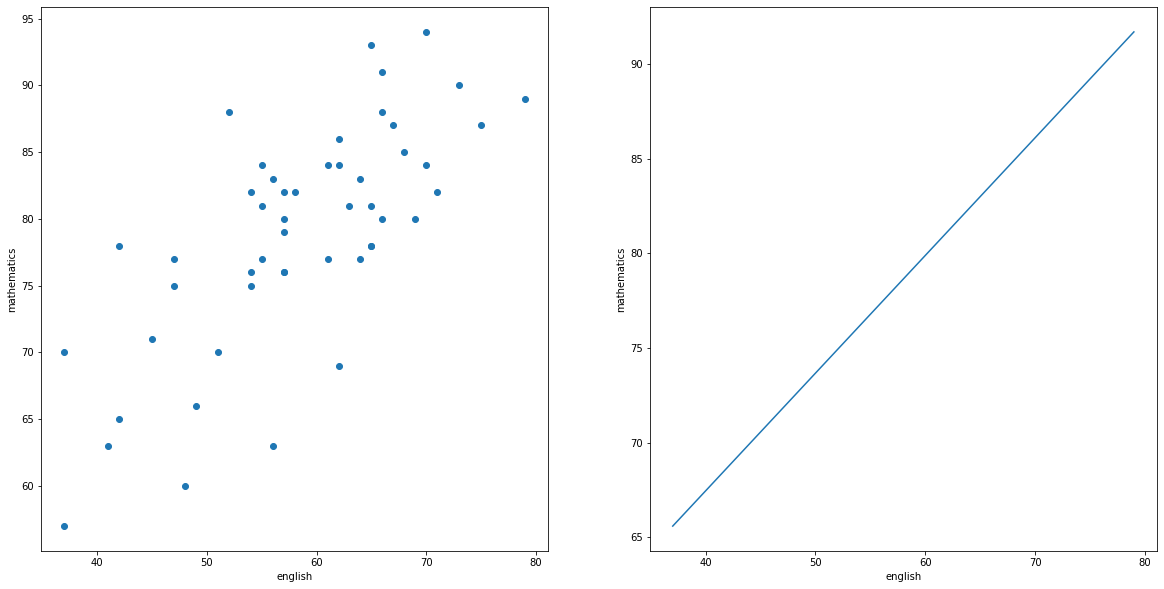

In [158]:
# 회귀직선
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

eng_socres=np.array(df['english'])
math_scores=np.array(df['mathematics'])

#계수 구하기
poly_fit=np.polyfit(eng_scores,math_scores,1)
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(eng_scores.min(),eng_scores.max())
ys=poly_1d(xs)
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
plt.show()

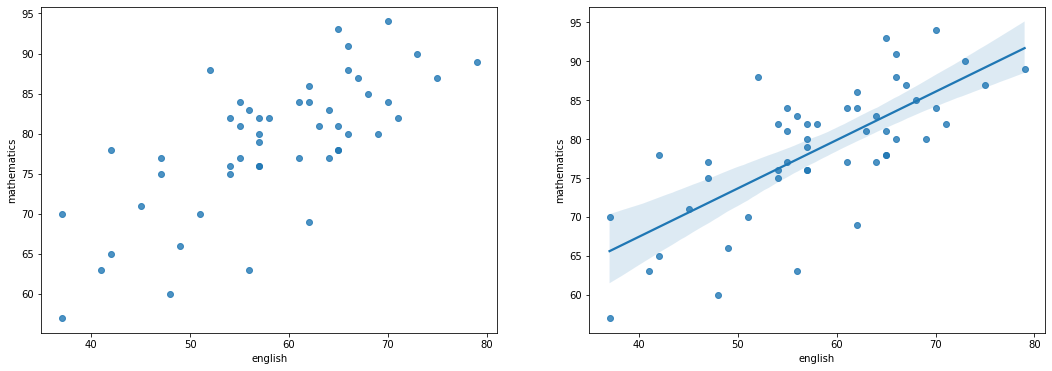

In [159]:
import seaborn as sns
fig, axes=plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0],x=df.english,y=df.mathematics,fit_reg=False)#fit_reg false는 회귀선 x 디폴트는 o
sns.regplot(ax=axes[1],x=df.english,y=df.mathematics)
plt.show()


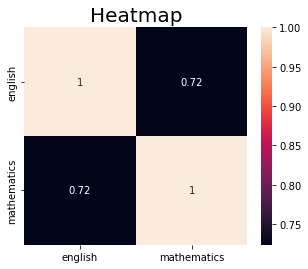

In [160]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap',fontsize=20)
plt.show()
plt.close()

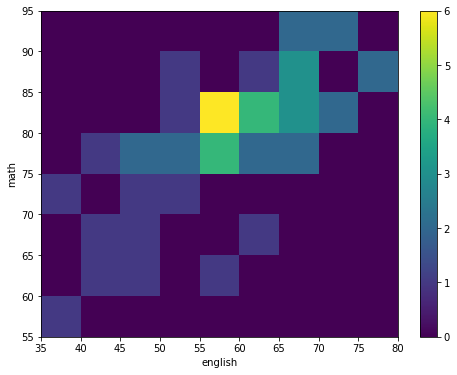

In [140]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
c=ax.hist2d(eng_scores,math_scores,bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [161]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [162]:
data=np.load('./data/ch3_anscombe.npy')

st_df=pd.DataFrame(index=['X_mean','X_variacne','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i,k in enumerate(anscombe_data):
    dataX=k[:,0]
    dataY=k[:,1]
    poly_fit=np.polyfit(dataX,dataY,1)
    st_df[f'data{i+1}']=[f'{np.mean(dataX):.2f}',
                            f'{np.var(dataX):.2f}',
                            f'{np.mean(dataY):.2f}',
                            f'{np.var(dataY):.2f}',
                            f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                            f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
st_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variacne,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


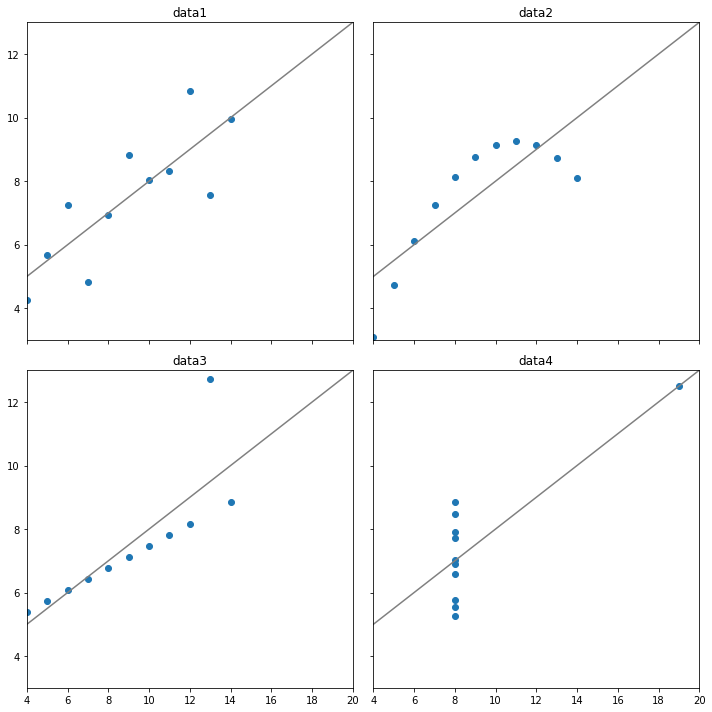

In [163]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10),
                      sharex=True,sharey=True)
xs=np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit=np.polyfit(data[:,0],data[:,1],1)
    poly_1d=np.poly1d(poly_fit)
    ys=poly_1d(xs)
    ax=axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
plt.tight_layout()
plt.show()

In [145]:
import pandas as pd
df=pd.read_csv('./data/5_2_fm.csv')
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [146]:
# Q. species 그룹별 통계량을 구하세요
df.groupby('species').describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [165]:
import pandas as pd
df=pd.read_csv('./data/5_2_shoes.csv')
df

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [167]:
# Q. 각 store의 컬러별 판매량을 파악할 수 있는 피봇 테이블을 작성하세요. 
pivot=pd.pivot_table(df, index='store',columns='color', values='sales',aggfunc='sum')
pivot

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [169]:
df.pivot_table(index=['store','color'],values='sales',aggfunc='sum')


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [170]:
import pandas as pd
df=pd.read_csv('./data/4_cov.csv')
df

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [173]:
# Q. x, y의 공분산을 구하세요.
x_dev = df.x - df.x.mean()
y_dev = df.y - df.y.mean()
print(sum(x_dev * y_dev)/(len(df)-1))
np.cov(x_dev,y_dev,ddof=1)

7.673333333333336


array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [150]:
df.cov().iloc[0,1].round(2)
df.corr().round(2)
np.corrcoef(x_dev,y_dev)

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])